# Explore here

In [25]:
import pandas as pd

train_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
test_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
test_price_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
test_data["price"] = test_price_data["price"]

total_data = pd.concat([train_data, test_data]).reset_index(inplace = False)
total_data.drop(columns = ["index"], inplace = True)
total_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [26]:
total_data.shape

(97790, 16)

In [27]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97790 entries, 0 to 97789
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              97790 non-null  int64  
 1   name                            97758 non-null  object 
 2   host_id                         97790 non-null  int64  
 3   host_name                       97748 non-null  object 
 4   neighbourhood_group             97790 non-null  object 
 5   neighbourhood                   97790 non-null  object 
 6   latitude                        97790 non-null  float64
 7   longitude                       97790 non-null  float64
 8   room_type                       97790 non-null  object 
 9   price                           97790 non-null  int64  
 10  minimum_nights                  97790 non-null  int64  
 11  number_of_reviews               97790 non-null  int64  
 12  last_review                     

Limpiar duplicados

In [28]:
total_data.drop(total_data, axis = 1).duplicated().sum()
#ningun valor duplicado

np.int64(0)

Remover columnas innecesarias

In [29]:
total_data.drop(['last_review','reviews_per_month','availability_365','latitude','longitude','neighbourhood_group'], axis = 1, inplace = True)
total_data.head()

,id,name,host_id,host_name,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,Private room,149,1,9,6
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,Entire home/apt,225,1,45,2
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,Private room,150,3,0,1
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,Entire home/apt,89,1,270,1
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,Entire home/apt,80,10,9,1


Analisis variables

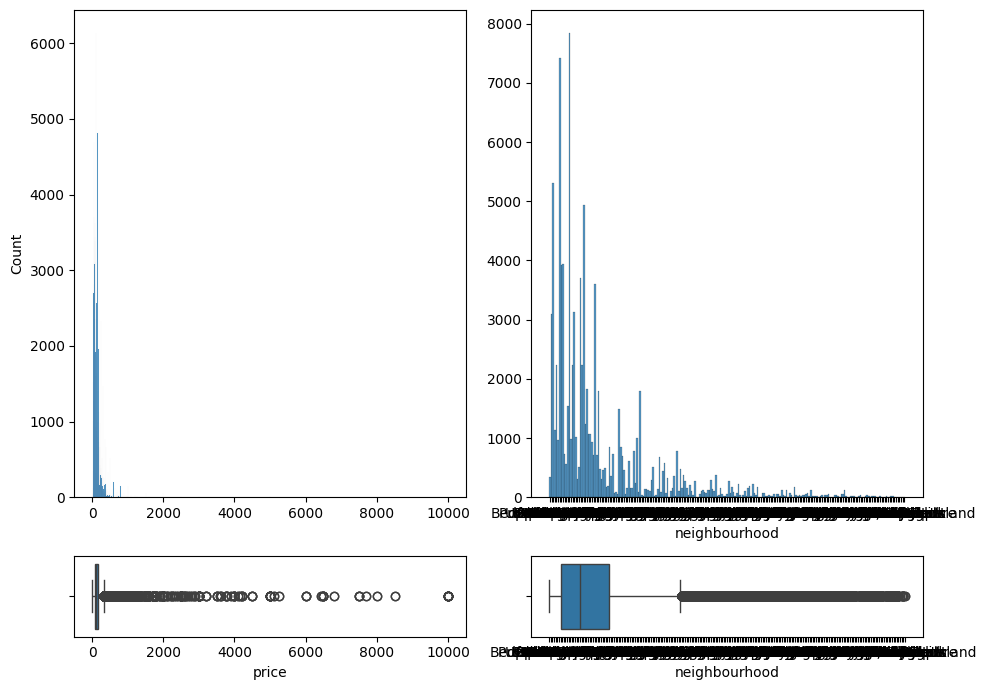

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(2, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [6, 1]})


sns.histplot(ax = axis[0, 0], data = total_data, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")
sns.histplot(ax = axis[0, 1], data = total_data, x = "neighbourhood").set(ylabel= None )
sns.boxplot(ax = axis[1, 1], data = total_data, x = "neighbourhood")


plt.tight_layout()


plt.show()

 Análisis de variables multivariante

In [31]:
# Convertir las columnas de objeto a categorías
total_data['neighbourhood'] = total_data['neighbourhood'].astype('category')
total_data['room_type'] = total_data['room_type'].astype('category')

# Verificar los cambios
print(total_data.dtypes)


id                                   int64
name                                object
host_id                              int64
host_name                           object
neighbourhood                     category
room_type                         category
price                                int64
minimum_nights                       int64
number_of_reviews                    int64
calculated_host_listings_count       int64
dtype: object


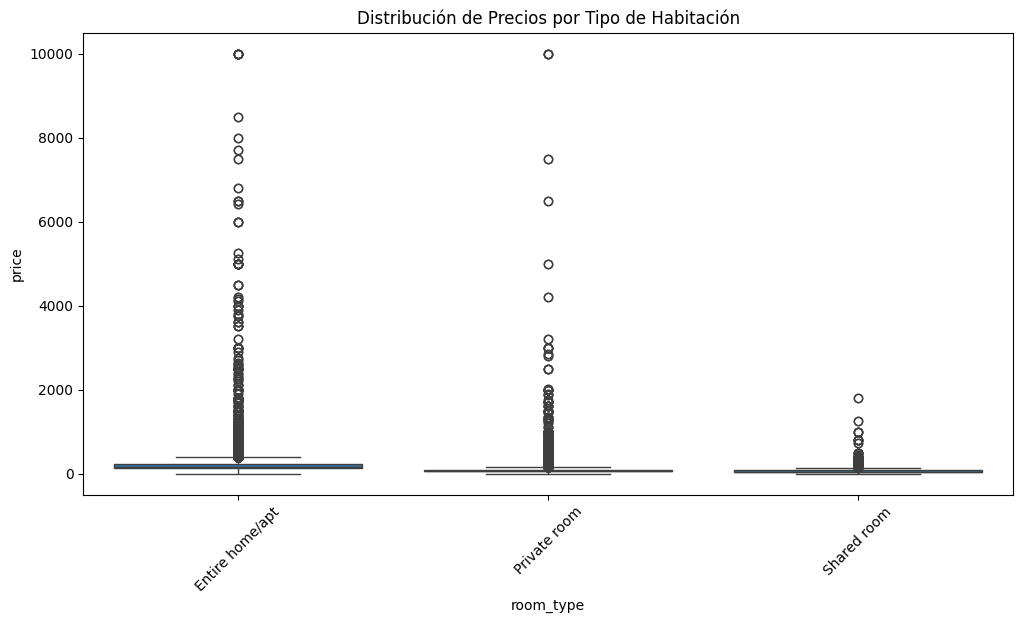

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='room_type', y='price', data=total_data)
plt.xticks(rotation=45)
plt.title('Distribución de Precios por Tipo de Habitación')
plt.show()


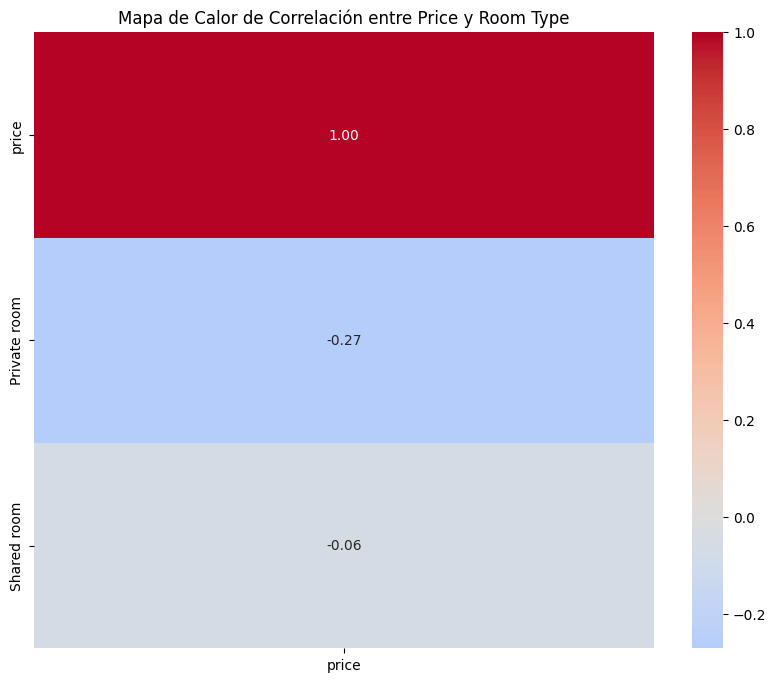

In [33]:




# Filtrar DataFrame para incluir solo los 10 vecindarios más concurridos
neighbourhoods_filtrados = total_data[total_data['neighbourhood'].isin(total_data['neighbourhood'].value_counts().nlargest(10).index)]


dummies_room_type = pd.get_dummies(neighbourhoods_filtrados['room_type'], drop_first=True)


data_with_dummies = neighbourhoods_filtrados[['price']].join(dummies_room_type)


correlation_matrix = data_with_dummies.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix[['price']], annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Mapa de Calor de Correlación entre Price y Room Type')
plt.show()




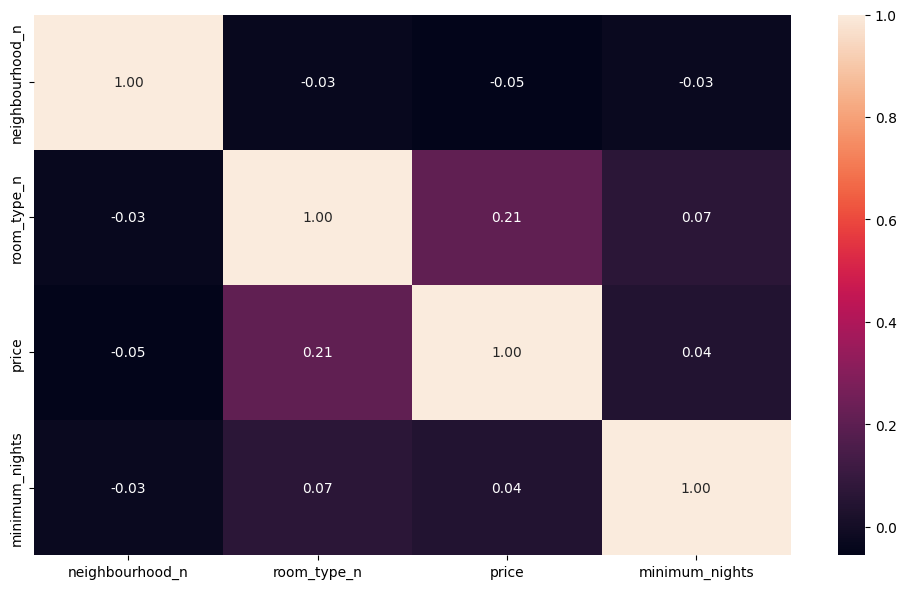

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Factorizar las variables categóricas
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]


fig, axis = plt.subplots(figsize=(10, 6))

sns.heatmap(total_data[["neighbourhood_n", "room_type_n", "price", "minimum_nights"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()
plt.show()





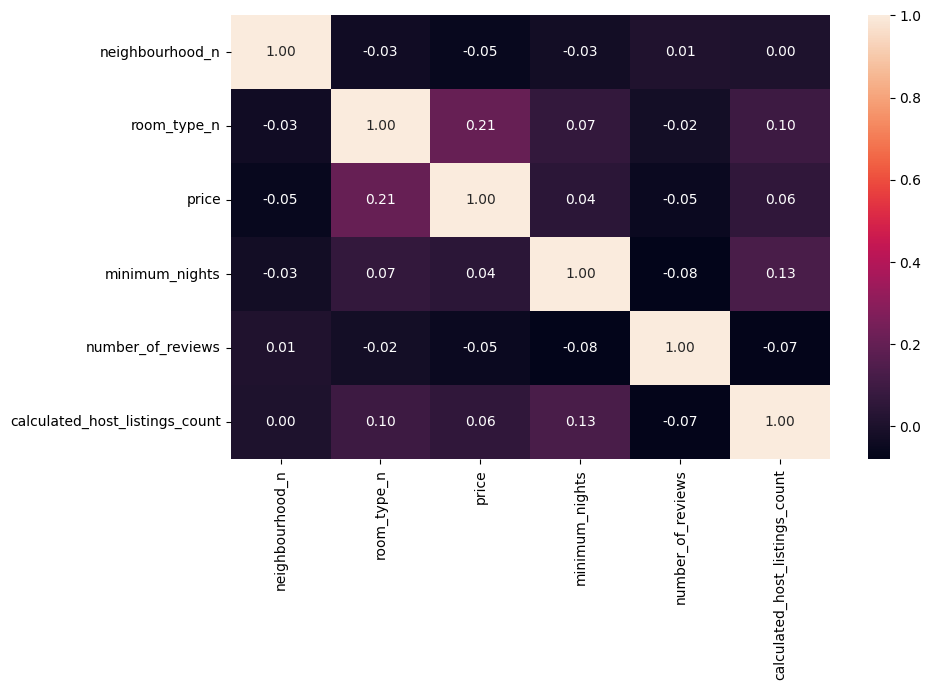

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Factorizar las variables categóricas
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]

# Crear un heatmap para visualizar la correlación
fig, axis = plt.subplots(figsize=(10, 7))

sns.heatmap(total_data[["neighbourhood_n", "room_type_n", "price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f")

plt.tight_layout()

plt.show()


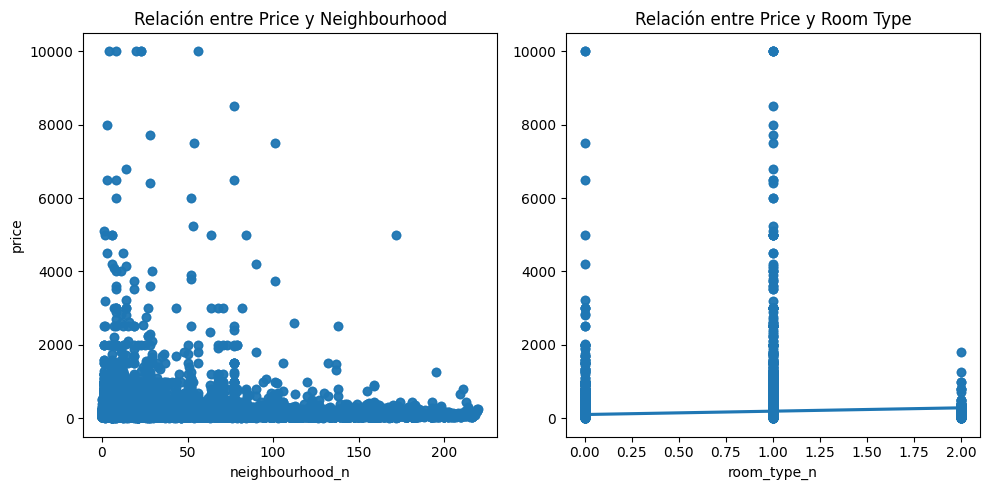

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axis = plt.subplots(figsize=(10, 5), ncols=2)

# Regplot para comprobar la relación entre price y neighbourhood
sns.regplot(ax=axis[0], data=total_data, x='neighbourhood_n', y='price')
axis[0].set_title('Relación entre Price y Neighbourhood')

# Regplot para comprobar la relación entre price y room_type
sns.regplot(ax=axis[1], data=total_data, x='room_type_n', y='price').set(ylabel=None)
axis[1].set_title('Relación entre Price y Room Type')

plt.tight_layout()
plt.show()


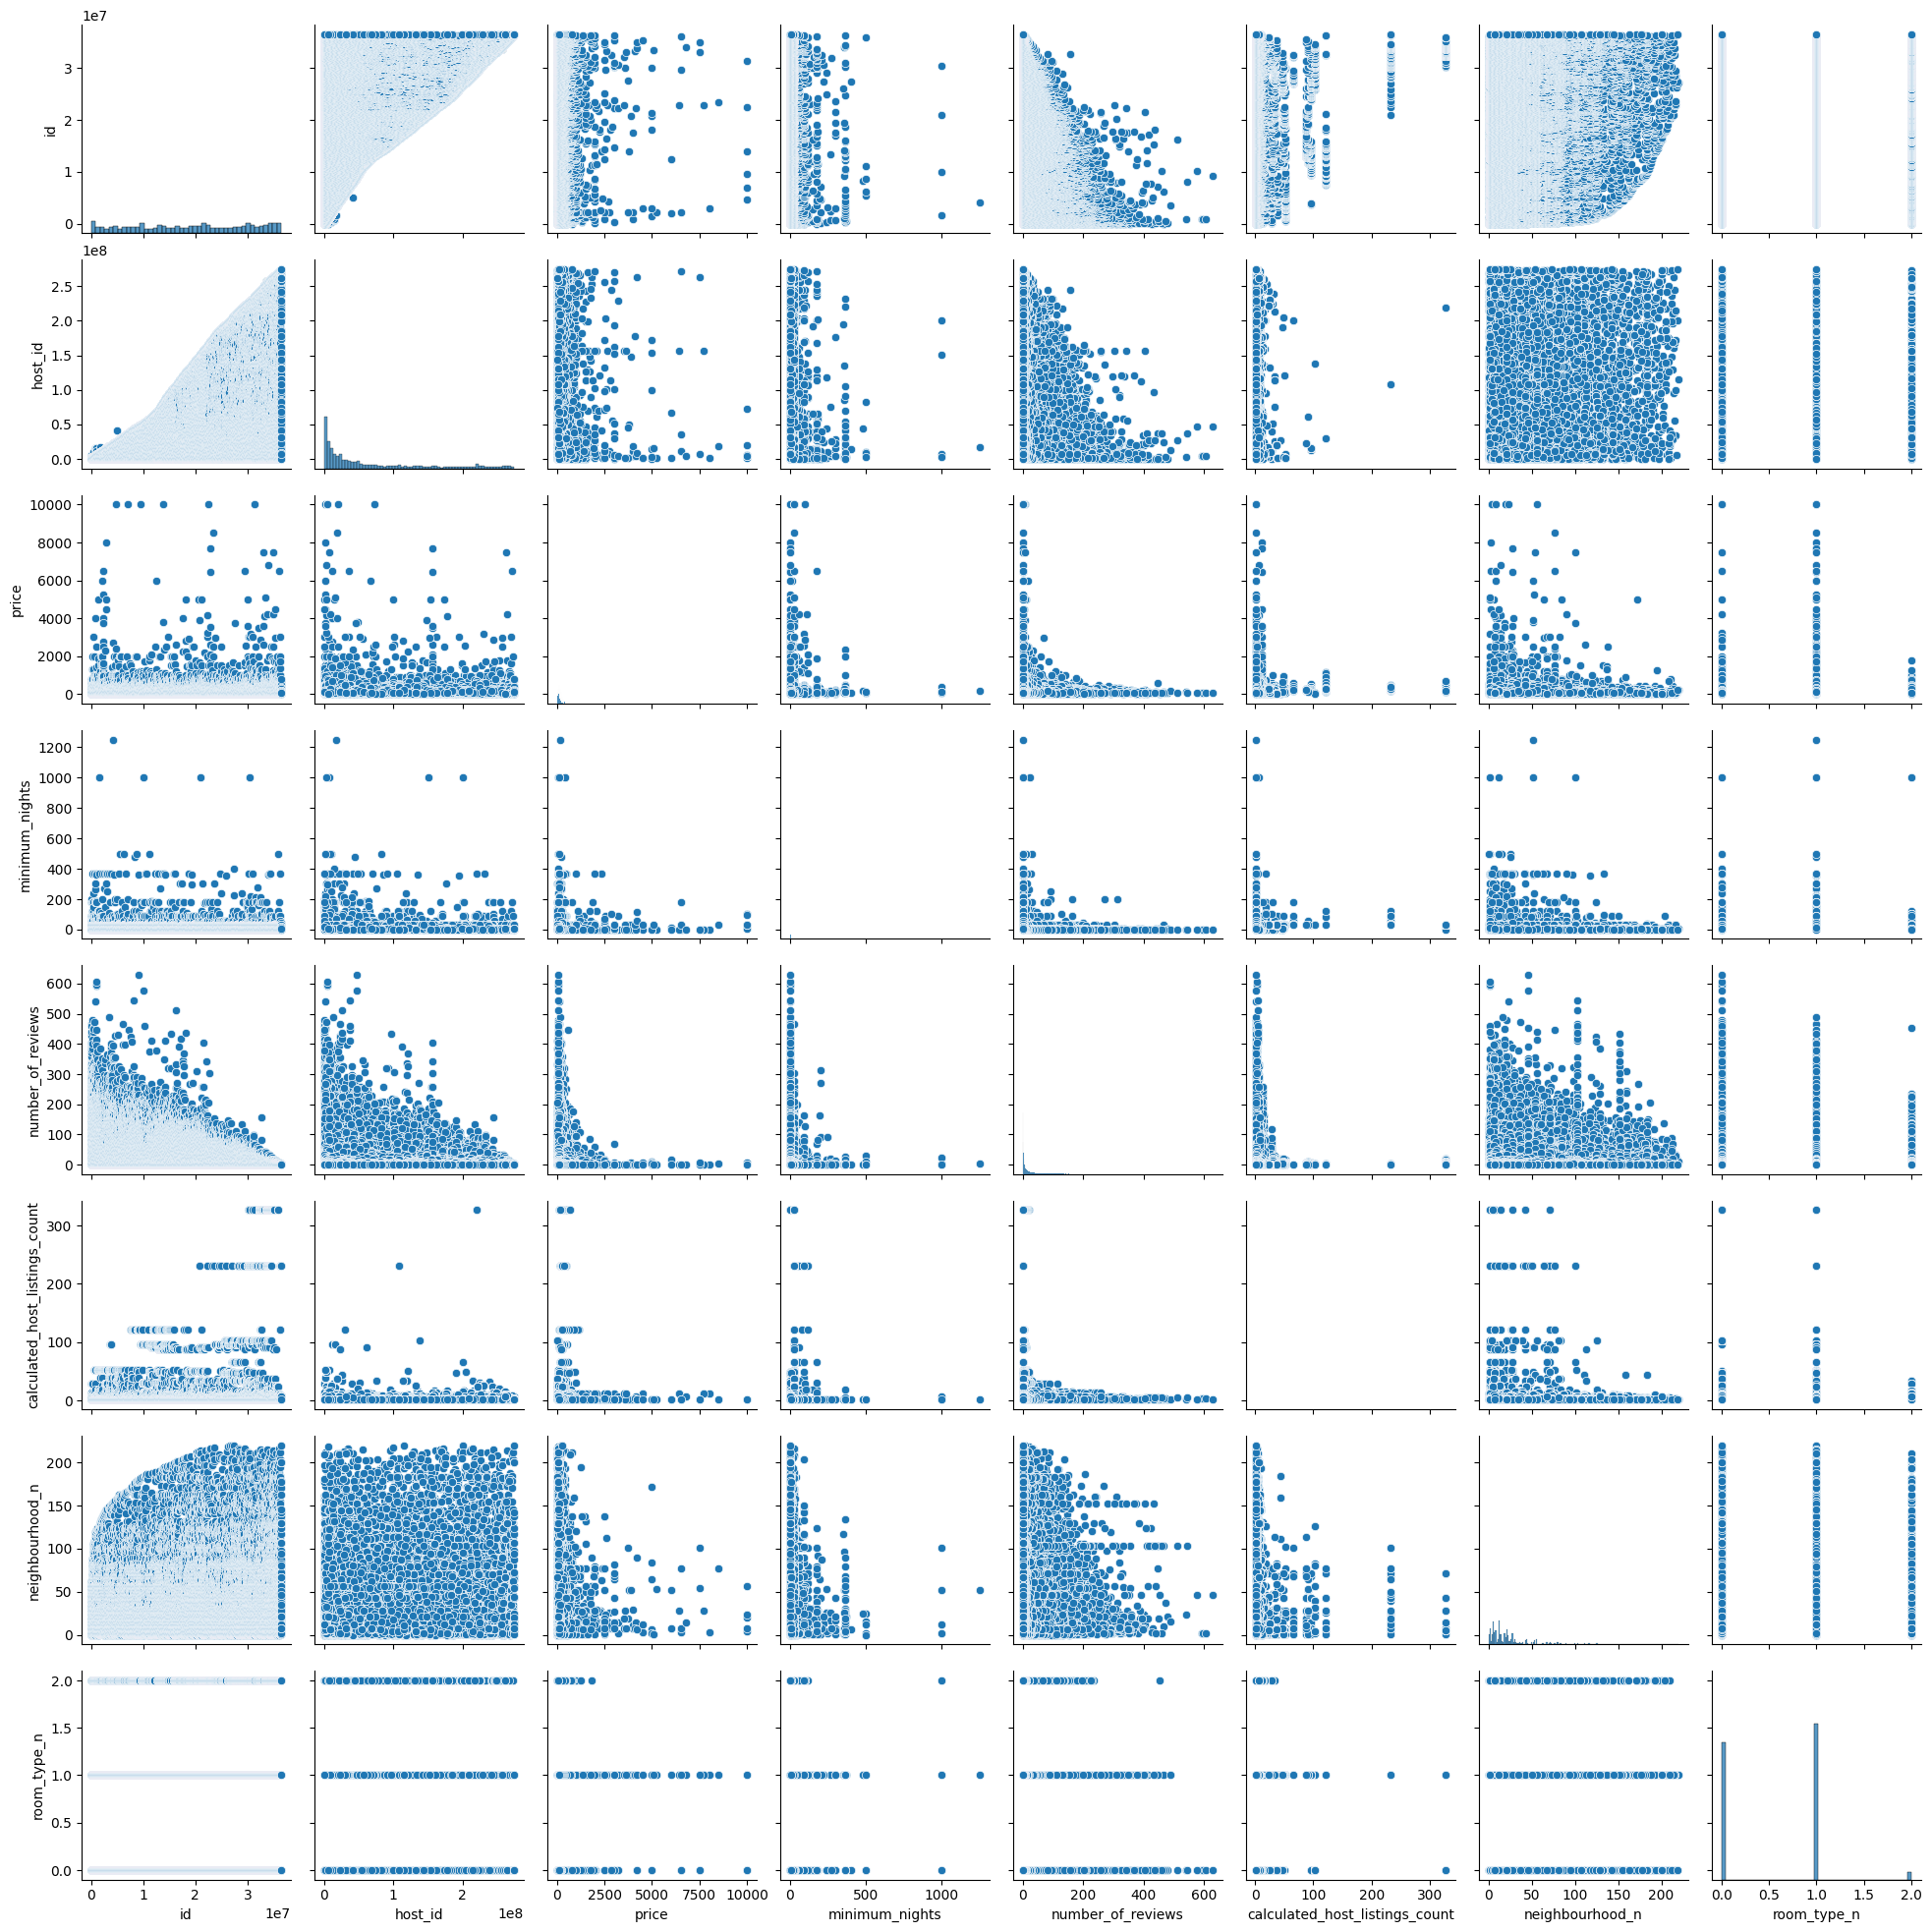

In [37]:
sns.pairplot(data = total_data)

In [38]:
total_data.describe()

,id,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_n,room_type_n
count,9.779000e+04,9.779000e+04,97790.000000,97790.000000,97790.000000,97790.000000,97790.000000,97790.000000
mean,1.901714e+07,6.762001e+07,152.720687,7.029962,23.274466,7.143982,29.888782,0.567113
std,1.098305e+07,7.861057e+07,240.152942,20.510445,44.550354,32.952350,34.676456,0.541246
min,2.539000e+03,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,9.471919e+06,7.821708e+06,69.000000,1.000000,1.000000,1.000000,7.250000,0.000000
50%,1.967728e+07,3.079382e+07,106.000000,3.000000,5.000000,1.000000,19.000000,1.000000
75%,2.915225e+07,1.074344e+08,175.000000,5.000000,24.000000,2.000000,37.000000,1.000000
max,3.648724e+07,2.743213e+08,10000.000000,1250.000000,629.000000,327.000000,220.000000,2.000000
